In [1]:
import pandas as pd
import os
import numpy as np

from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.dates import DateFormatter, ConciseDateFormatter
from matplotlib.ticker import MaxNLocator, FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
import palettable 

In [2]:
key_data = pd.read_csv('Key_Data.csv')        # import prepocessed data including variables: community, cits , cits credit and etc.
V0 = pd.read_csv('regression_variables.csv')  # covariates and confounders interacting with research interest and collaboration
print(len(key_data))
print(len(V0))

236104
49628


In [3]:
key_data.head(3)

,index_i,mentee_id,mentor_id,community,paper_num_mte,paper_num_mto,paper_ratio_mte,paper_ratio_mto,credit_mte,credit_mto,...,total_cits_mte,total_cits_mto,total_cits5_mte,total_cits5_mto,cits_mte,cits_mto,cits5_mte,cits5_mto,birthYear_mte,birthYear_mto
0,0,A1964335128,A177689540,5.0,0,26,0.0,1.0,0.000000,96.139683,...,7237.0,21415.0,4403.0,5485.0,0.0,1996.0,0.0,673.0,2004,1956
1,0,A1964335128,A177689540,3.0,0,42,0.0,1.0,0.000000,150.796825,...,7237.0,21415.0,4403.0,5485.0,0.0,1276.0,0.0,264.0,2004,1956
2,0,A1964335128,A177689540,6.0,25,0,1.0,0.0,523.366667,0.000000,...,7237.0,21415.0,4403.0,5485.0,4163.0,0.0,2469.0,0.0,2004,1956


In [4]:
V0.head(3)

,mentee_id,mentor_id,communitys_paper_num_mte,total_cits5_mte,total_credit_mte,birthYear_mte,communitys_paper_num_mto,total_cits5_mto,career_len_mte,career_len_mto,...,topic_num10_mto,total_papers_mte,total_papers_mto,colla_work_count,colla_work_count_first5,colla_work_count_later5,collaborators_mte_count,common_cllaborators_count,ratio_common_collaborators,mte_work_first5_count
0,A1964335128,A177689540,67,4403.0,739.891667,2004,284,5485.0,18,64,...,5,117,405,9,9,0,34,7,0.205882,12
1,A2047598244,A2124458367,40,2013.0,73.733081,2005,244,11491.0,17,60,...,5,75,627,11,2,9,23,9,0.391304,33
2,A2141337483,A328693186,24,1161.0,50.217857,1869,180,9040.0,151,37,...,4,36,413,2,0,2,6,4,0.666667,1


In [5]:
key_data.columns

Index(['index_i', 'mentee_id', 'mentor_id', 'community', 'paper_num_mte',
       'paper_num_mto', 'paper_ratio_mte', 'paper_ratio_mto', 'credit_mte',
       'credit_mto', 'communitys_paper_num_mto', 'communitys_paper_num_mte',
       'total_credit_mte', 'total_credit_mto', 'type', 'total_cits_mte',
       'total_cits_mto', 'total_cits5_mte', 'total_cits5_mto', 'cits_mte',
       'cits_mto', 'cits5_mte', 'cits5_mto', 'birthYear_mte', 'birthYear_mto'],
      dtype='object')

In [6]:
V0.columns

Index(['mentee_id', 'mentor_id', 'communitys_paper_num_mte', 'total_cits5_mte',
       'total_credit_mte', 'birthYear_mte', 'communitys_paper_num_mto',
       'total_cits5_mto', 'career_len_mte', 'career_len_mto',
       'yearly_cits5_mto', 'topic_num10_mte', 'topic_num10_mto',
       'total_papers_mte', 'total_papers_mto', 'colla_work_count',
       'colla_work_count_first5', 'colla_work_count_later5',
       'collaborators_mte_count', 'common_cllaborators_count',
       'ratio_common_collaborators', 'mte_work_first5_count'],
      dtype='object')

#### overall scientists

In [7]:
# here only consider scientists with with career durations of more than 30 years
thd = 1990
V2000 = V0['mentee_id'][V0.birthYear_mte<=thd]
key_data = key_data[(key_data.paper_num_mte>0)&(key_data.mentee_id.isin(V2000))]
print('sample size: ',len(set(key_data['mentee_id'])))

sample size:  11436


In [8]:
def num_new(tp_df):
    
    num = len(tp_df[tp_df.type=='new'])
    
    return num

def num_follow(tp_df):
    
    num = len(tp_df[tp_df.type!='new'])
    
    return num

In [9]:
Num_new = key_data.groupby(['mentee_id','mentor_id']).apply(num_new).reset_index(name='num_new')
Num_follow = key_data.groupby(['mentee_id','mentor_id']).apply(num_follow).reset_index(name='num_follow')

Num_follow_new = Num_follow.merge(Num_new,on=['mentee_id','mentor_id'],how='left')
Num_follow_new['ratio of new'] = Num_follow_new['num_new']/(Num_follow_new['num_follow'] + Num_follow_new['num_new'])
Num_follow_new['ratio of follow'] = Num_follow_new['num_follow']/(Num_follow_new['num_follow'] + Num_follow_new['num_new'])
Num_follow_new_All = Num_follow_new

In [10]:
Num_follow_new.head(5)

,mentee_id,mentor_id,num_follow,num_new,ratio of new,ratio of follow
0,A1002422011,A1897971127,2,0,0.00,1.00
1,A1002422011,A1966502692,2,0,0.00,1.00
2,A100328954,A1993268291,1,3,0.75,0.25
3,A100328954,A2157074446,3,1,0.25,0.75
4,A100328954,A2780364925,1,3,0.75,0.25


In [11]:
only_follow = Num_follow_new[['mentee_id','mentor_id']][(Num_follow_new.num_new==0)&(Num_follow_new.num_follow>0)]
pie_only_follow = len(only_follow)/len(Num_follow_new)

follow_disrupt = Num_follow_new[['mentee_id','mentor_id']][(Num_follow_new.num_new>0)&(Num_follow_new.num_follow>0)]
pie_follow_disrupt = len(follow_disrupt)/len(Num_follow_new)

only_disrupt = Num_follow_new[['mentee_id','mentor_id']][(Num_follow_new.num_new>0)&(Num_follow_new.num_follow==0)]
pie_only_disrupt = len(only_disrupt)/len(Num_follow_new)

print(pie_only_follow,pie_follow_disrupt,pie_only_disrupt)
print(pie_only_follow + pie_follow_disrupt + pie_only_disrupt)

0.32831836932783304 0.5575103130308178 0.11417131764134919
1.0


In [12]:
only_follow = only_follow.merge(key_data,on=['mentee_id','mentor_id'],how='left')
only_follow_surpasser = only_follow[only_follow.total_credit_mte>=only_follow.total_credit_mto]
bar_only_follow_surpasser = len(only_follow_surpasser)/len(only_follow)
bar_only_follow_behinder = 1 - bar_only_follow_surpasser

follow_disrupt = follow_disrupt.merge(key_data,on=['mentee_id','mentor_id'],how='left')
follow_disrupt_surpasser = follow_disrupt[follow_disrupt.total_credit_mte>=follow_disrupt.total_credit_mto]
bar_follow_disrupt_surpasser = len(follow_disrupt_surpasser)/len(follow_disrupt)
bar_follow_disrupt_behinder = 1 - bar_follow_disrupt_surpasser

only_disrupt = only_disrupt.merge(key_data,on=['mentee_id','mentor_id'],how='left')
only_disrupt_surpasser = only_disrupt[only_disrupt.total_credit_mte>=only_disrupt.total_credit_mto]
bar_only_disrupt_surpasser = len(only_disrupt_surpasser)/len(only_disrupt)
bar_only_disrupt_behinder = 1 - bar_only_disrupt_surpasser

#### High-impact scientists

In [13]:
key_data_0 = pd.read_csv('Key_Data.csv')
print(key_data_0.shape)
print(thd)
V20 = V0['mentee_id'][V0.birthYear_mte<=thd]
key_data_0 = key_data_0[(key_data_0.paper_num_mte>0)&(key_data_0.mentee_id.isin(V20))]
print(len(set(key_data_0.mentee_id)))

(236104, 25)
1990
11436


In [14]:
# elite scientists: top 20% total cits
V0['yearly_cits5_mte'] = V0['total_cits5_mte']/V0['career_len_mte']
q80_total_cits5 = V0[['yearly_cits5_mte','total_cits5_mte']].quantile([0.25,0.80]).total_cits5_mte.tolist()[1]
print(q80_total_cits5)

V0_elite = V0['mentee_id'][V0.total_cits5_mte>=q80_total_cits5]
key_data = key_data_0[key_data_0.mentee_id.isin(V0_elite)]

4331.200000000012


In [15]:
Num_new = key_data.groupby(['mentee_id','mentor_id']).apply(num_new).reset_index(name='num_new')
Num_follow = key_data.groupby(['mentee_id','mentor_id']).apply(num_follow).reset_index(name='num_follow')
Num_follow_new = Num_follow.merge(Num_new,on=['mentee_id','mentor_id'],how='left')

Num_follow_new['ratio of new'] = Num_follow_new['num_new']/(Num_follow_new['num_follow'] + Num_follow_new['num_new'])
Num_follow_new['ratio of follow'] = Num_follow_new['num_follow']/(Num_follow_new['num_follow'] + Num_follow_new['num_new'])
Num_follow_new_Elite = Num_follow_new

In [16]:
Num_follow_new.head(3)

,mentee_id,mentor_id,num_follow,num_new,ratio of new,ratio of follow
0,A100328954,A1993268291,1,3,0.75,0.25
1,A100328954,A2157074446,3,1,0.25,0.75
2,A100328954,A2780364925,1,3,0.75,0.25


In [17]:
only_follow = Num_follow_new[['mentee_id','mentor_id']][(Num_follow_new.num_new==0)&(Num_follow_new.num_follow>0)]
pie_only_follow_elite = len(only_follow)/len(Num_follow_new)

follow_disrupt = Num_follow_new[['mentee_id','mentor_id']][(Num_follow_new.num_new>0)&(Num_follow_new.num_follow>0)]
pie_follow_disrupt_elite = len(follow_disrupt)/len(Num_follow_new)

only_disrupt = Num_follow_new[['mentee_id','mentor_id']][(Num_follow_new.num_new>0)&(Num_follow_new.num_follow==0)]
pie_only_disrupt_elite = len(only_disrupt)/len(Num_follow_new)

print(pie_only_follow_elite,pie_follow_disrupt_elite,pie_only_disrupt_elite)

0.2394689395181118 0.6908703491230945 0.06966071135879363


##### Surpasser ratio : later to plot

In [18]:
only_follow = only_follow.merge(key_data,on=['mentee_id','mentor_id'],how='left')
only_follow_surpasser = only_follow[only_follow.total_credit_mte>=only_follow.total_credit_mto]
bar_only_follow_surpasser_elite = len(only_follow_surpasser)/len(only_follow)
bar_only_follow_behinder_elite = 1 - bar_only_follow_surpasser_elite

follow_disrupt = follow_disrupt.merge(key_data,on=['mentee_id','mentor_id'],how='left')
follow_disrupt_surpasser = follow_disrupt[follow_disrupt.total_credit_mte>=follow_disrupt.total_credit_mto]
bar_follow_disrupt_surpasser_elite = len(follow_disrupt_surpasser)/len(follow_disrupt)
bar_follow_disrupt_behinder_elite = 1 - bar_follow_disrupt_surpasser_elite

only_disrupt = only_disrupt.merge(key_data,on=['mentee_id','mentor_id'],how='left')
only_disrupt_surpasser = only_disrupt[only_disrupt.total_credit_mte>=only_disrupt.total_credit_mto]
bar_only_disrupt_surpasser_elite = len(only_disrupt_surpasser)/len(only_disrupt)
bar_only_disrupt_behinder_elite = 1 - bar_only_disrupt_surpasser_elite

In [19]:
print(round(bar_only_follow_surpasser,2),round(bar_only_follow_behinder,2))
print(round(bar_follow_disrupt_surpasser,2),round(bar_follow_disrupt_behinder,2))
print(round(bar_only_disrupt_surpasser,2),round(bar_only_disrupt_behinder,2))

print(round(bar_only_follow_surpasser_elite,2),round(bar_only_follow_behinder_elite,2))
print(round(bar_follow_disrupt_surpasser_elite,2),round(bar_follow_disrupt_behinder_elite,2))
print(round(bar_only_disrupt_surpasser_elite,2),round(bar_only_disrupt_behinder_elite,2))

0.16 0.84
0.52 0.48
0.73 0.27
0.26 0.74
0.64 0.36
0.85 0.15


### Plot

##### pie plot

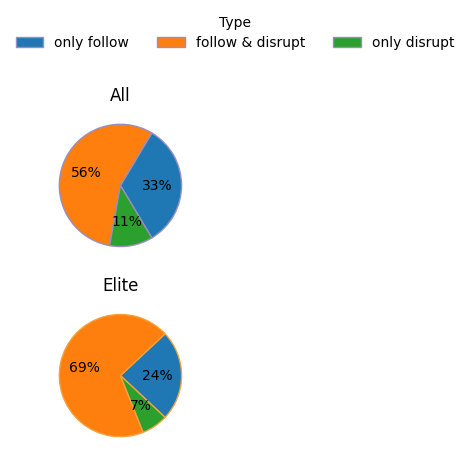

In [20]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)
fig.subplots_adjust(wspace=0)

#                                                          upper left panel
ax1 = fig.add_subplot(gs[0, 0])
# pie chart parameters
overall_ratios = [pie_only_follow, pie_follow_disrupt, pie_only_disrupt]
labels = ['only follow', 'follow & disrupt', 'only disrupt']
explode = [0.0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.0f%%', startangle=angle,
                      explode=explode, wedgeprops={'edgecolor': '#998ec3'}) #998ec3

ax1.set(title='All')


ax1.legend(wedges, labels,
          title="Type",
          loc="center",
          bbox_to_anchor=(1.0, 1, 0.5, 1),
          ncol=3,
          frameon=0)


#                                                            high impact
ax2 = fig.add_subplot(gs[1, 0])
overall_ratios = [pie_only_follow_elite, pie_follow_disrupt_elite, pie_only_disrupt_elite]
labels = ['only follow', 'follow & disrupt', 'only disrupt']
explode = [0.0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax2.pie(overall_ratios, autopct='%1.0f%%', startangle=angle,
                      explode=explode, wedgeprops={'edgecolor': '#f1a340'})
ax2.set(title='Elite')


fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()
# fig.savefig('result_data_plot/new_plot/topic_ratio.pdf')

##### bar plot

In [21]:
ratios_All = [pie_only_follow, pie_follow_disrupt, pie_only_disrupt]
ratios_Elite = [pie_only_follow_elite, pie_follow_disrupt_elite, pie_only_disrupt_elite]

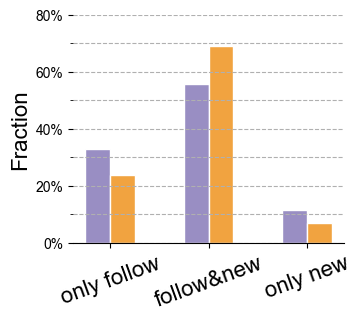

In [22]:
width = 0.5
x = np.array(range(3))*2

fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.7*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

p = ax.bar(x, ratios_All, width,label=f'primary',color='#998ec3') #,ec='lightgrey'
p = ax.bar(x+width, ratios_Elite, width,label=f'secondary', color='#f1a340')

X = x+0.25
X_ticks = ['only follow','follow&new','only new']
c = ax.set_xticks(ticks=X,labels=X_ticks,rotation=20,fontsize=16)
ax.set_ylabel('Fraction',fontsize=16)
ax.set_ylim([0.0,0.8])
ax.grid(True,ls="--", axis='y',which='both')
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_yticks([0.0,0.2,0.4,0.6,0.8], ['0%','20%','40%','60%','80%'])
sns.despine(left=True)
# fig.savefig('result_data_plot/new_plot/topic_ratio.pdf')

##### kde plot

In [23]:
Num_follow_new_All['type'] = 'All'
Num_follow_new_Elite['type'] = 'Elite'

data_kde = pd.concat((Num_follow_new_All,Num_follow_new_Elite))
data_kde.head(3)

,mentee_id,mentor_id,num_follow,num_new,ratio of new,ratio of follow,type
0,A1002422011,A1897971127,2,0,0.00,1.00,All
1,A1002422011,A1966502692,2,0,0.00,1.00,All
2,A100328954,A1993268291,1,3,0.75,0.25,All


[Text(0.5, 0, 'ratio of new topic'),
 Text(0, 0.5, 'kernel density'),
 (0.0, 4.1)]

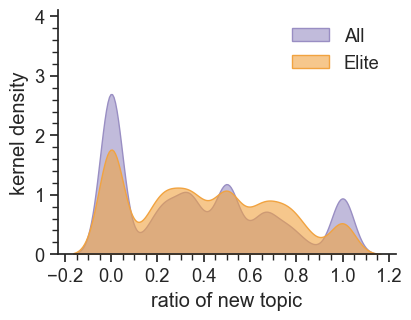

In [24]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.8*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

sns.kdeplot(Num_follow_new_All, x="ratio of new",fill=1,label='All',color='#998ec3',alpha=0.6,
            ax=ax)

sns.kdeplot(Num_follow_new_Elite, x="ratio of new",fill=1,label='Elite',color='#f1a340',alpha=0.6,
            ax=ax)
plt.legend(frameon=0)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
# 隐藏右侧和顶部边框
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set(xlabel='ratio of new topic',ylabel='kernel density',ylim=[0,4.1])

# fig.savefig('result_data_plot/new_plot/topic_ratio_distribution.pdf')

##### CCDF plot

[Text(0.5, 0, 'ratio of new topic'),
 Text(0, 0.5, 'CCDF'),
 (0.0, 1.0),
 (0.0, 1.05)]

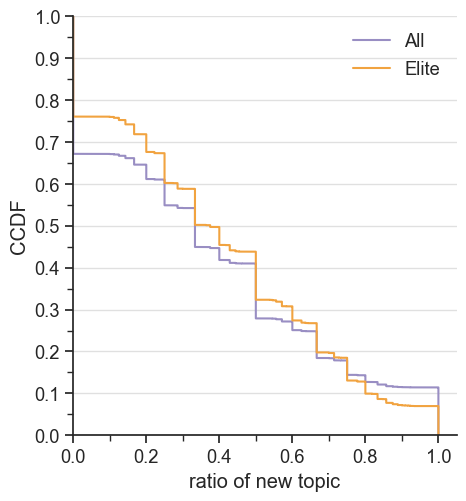

In [25]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[0.65*7,0.7*7])
sns.set(style='ticks',font_scale=1.2, font='Arial')

#All researcher
data = list(Num_follow_new_All['ratio of new'])
# Sort the data in ascending order
sorted_data = np.sort(data)
# Calculate the CCDF
ccdf = 1 - np.linspace(0, 1, len(sorted_data))
# Create a DataFrame for Seaborn
ax.step(sorted_data, ccdf, where='post',label='All',color='#998ec3',alpha=1) 

#Elite researcher
data = list(Num_follow_new_Elite['ratio of new'])
# Sort the data in ascending order
sorted_data = np.sort(data)
# Calculate the CCDF
ccdf = 1 - np.linspace(0, 1, len(sorted_data))
# Create a DataFrame for Seaborn
ax.step(sorted_data, ccdf, where='post',label='Elite',color='#f1a340',alpha=1)
plt.legend(frameon=0)
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
# 隐藏右侧和顶部边框
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid(axis='y',alpha=0.6)

ax.set(xlabel='ratio of new topic',ylabel='CCDF',
       ylim=[0,1.0],xlim=[0,1.05])
# fig.savefig('result_data_plot/new_plot/topic_ratio_distribution(CCDF).pdf')